<h1> Revisão Sistemática </h1>
</br>
Escrever funções para mostrar os gráficos capazes de responder as seguintes questões:

Sobre os trabalhos selecionados:
<ul>
<li>Quais são as palavras-chaves utilizadas?</li>
<li>Qual o percentual de acerto? (quantas palavras da string de busca o artigo curtiu(????))</li>
<li>Qual o número de páginas?</li>
</ul>
Sobre os trabalhos cortados:
<ul>
<li>Quais são as palavras-chaves utilizadas?</li>
<li>Quantas vezes as palavras utilizadas na string de busca apareceram nos artigos?</li>
</ul>

Para todos (feita):
<ul>
<li>Qual o ano de publicação?</li>
</ul>

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
'''Importar os CSVs'''

df1 = pd.DataFrame(pd.read_csv("todos.csv"))
df2 = pd.DataFrame(pd.read_csv("menosdedois.csv"))
df3 = pd.DataFrame(pd.read_csv("maisdedois.csv"))
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Nº,Selecionador por,Nome do Arquivo,Título,Nota - Grazi,Nota - Hugo,Nota- Jéssica,Somatório,Ano
1,1,Grazi,10.1007%2Fs40846-016-0184-2.pdf,“Evaluation of Kinect 3D Sensor for Healthcare...,0.5,0.5,0.5,1.5,2016
2,2,Grazi,10.1007%2Fs13272-015-0157-0.pdf,“Helicopter emergency medical service: motivat...,0.5,0.5,0.5,1.5,2015
3,3,Grazi,10.1007%2Fs12652-016-0374-3.pdf,“Exploring the ambient assisted living domain:...,0.5,0,0,0.5,2016
4,4,Grazi,10.1007%2Fs12243-016-0550-7.pdf,“Majority-consensus fusion approach for eldery...,1.0,1.0,1.0,3.0,2016
5,5,Jessica,10.1007_2Fs00779-014-0815-y.pdf,“3D ActionSLAM: Wearable person tracking in mu...,0,0,0.5,0.5,2014
6,6,Jessica,10.1007_2Fs10514-016-9586-9.pdf,“Enabling Personalised Medical Support for chr...,0.5,0,0.5,1.0,2016
7,7,Jessica,10.1007_2Fs11036-014-0516-9.pdf,“Behavior and Capability Based Access Control ...,0.5,0.5,0.5,1.5,2014
8,8,Jessica,10.1007_2Fs11042-016-3267-8.pdf,“Towards online and personalized daily activit...,0.5,1.0,0.5,2.0,2016
9,9,Jessica,10.1007_2Fs11276-018-1694-3.pdf,“Techonological aspects of WBANs for health mo...,1.0,1.0,1.0,3.0,2018


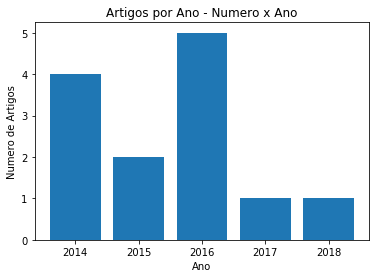

In [17]:
def mostrar_grafico_artigos_por_ano(df):
    dfPoint = pd.DataFrame(np.array(df.iloc[1:,8]))
    dfPoint.columns = ['ano']
    lista_de_anos = dfPoint['ano'].tolist()

    anos_dict = []
    for ano in lista_de_anos:
        e = (ano, lista_de_anos.count(ano))
        if e not in anos_dict:
            anos_dict.append(e)

    anos_dict.sort()
       
    plt.title("Artigos por Ano - Numero x Ano")
    plt.xlabel("Ano")
    plt.ylabel("Numero de Artigos")

    plt.bar(range(len(anos_dict)), [e[1] for e in anos_dict], align='center')
    plt.xticks(range(len(anos_dict)), [e[0] for e in anos_dict])
    plt.show()

mostrar_grafico_artigos_por_ano(df1)

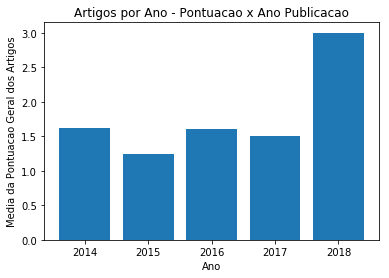

In [16]:
def mostra_somatorio_artigo_por_ano(df):
    numero = pd.DataFrame(np.array(['A'+str(i) for i in df.iloc[1:,0]]))
    selecionado = pd.DataFrame(np.array(df.iloc[1:,1]))
    titulo = pd.DataFrame(np.array(df.iloc[1:,3]))
    notaGrazi = pd.DataFrame(np.array(df.iloc[1:,4]))
    notaHugo = pd.DataFrame(np.array(df.iloc[1:,5]))
    notaJessica = pd.DataFrame(np.array(df.iloc[1:,6]))
    somatorio = pd.DataFrame(np.array(df.iloc[1:,7]))
    ano = pd.DataFrame(np.array(df.iloc[1:,8]))

    dfPoint = pd.concat([numero,somatorio,ano],axis=1)
    dfPoint.columns = ['ID Artigo','somatorio','ano']
#     dfPoint = dfPoint.apply(pd.to_numeric)

    anos = dfPoint['ano']
    anos = list(set(anos))

    ano_total = []

    for ano in anos:
        total = 0
        qtd = 0
        for i in range(len(dfPoint['ano'])):
            if(dfPoint['ano'][i] == ano):
                total += float(dfPoint['somatorio'][i])
                qtd += 1
        ano_total.append([ano,total/float(qtd)])

    ano_total.sort()

    plt.title("Artigos por Ano - Pontuacao x Ano Publicacao")
    plt.xlabel("Ano")
    plt.ylabel("Media da Pontuacao Geral dos Artigos")
    plt.bar(range(len(ano_total)), [e[1] for e in ano_total], align='center')
    plt.xticks(range(len(ano_total)), [e[0] for e in ano_total])
    
    plt.show()

mostra_somatorio_artigo_por_ano(df1)

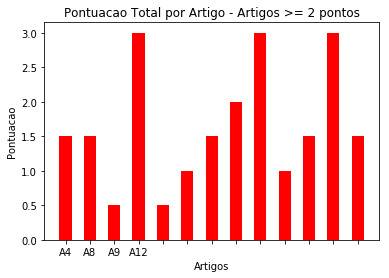

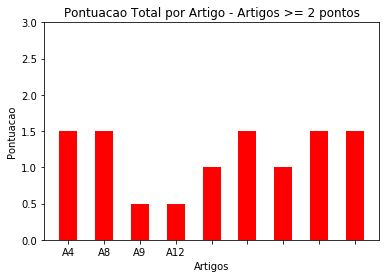

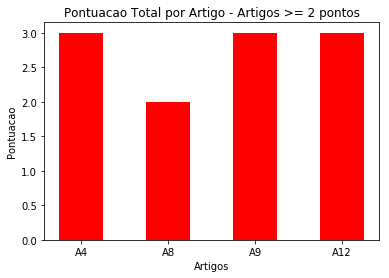

In [4]:
def mostrar_grafico_pontuacao_total_por_artigo(df):
    somatorio = pd.DataFrame(np.array(df.iloc[1:,7]))
    somatorio.columns = ['somatorio']
    somatorio = somatorio.apply(pd.to_numeric)

    s = somatorio['somatorio']

    N = len(s)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence

    p1t = plt.bar(ind, s, width, color='red', align='center')

    plt.autoscale(enable=True, axis='both', tight=None)
    plt.ylabel('Pontuacao')
    plt.xlabel('Artigos')
#     plt.title('Pontuacao Total por Artigo - Todos Artigos Selecionados')
#     plt.xticks(ind,('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12', 'A13'))
    '''Menos de 2 Pontos'''
#     plt.title('Pontuacao Total por Artigo - Artigos < 2 pontos')
#     plt.xticks(ind,('A1','A2','A3','A5','A6','A7','A10','A11', 'A13'))
    '''Maior ou Igual a 2 Pontos'''
    plt.title('Pontuacao Total por Artigo - Artigos >= 2 pontos')
    plt.xticks(ind,('A4','A8','A9','A12'))
    plt.yticks(np.arange(0, 3.5, 0.5))
    plt.show()
    
mostrar_grafico_pontuacao_total_por_artigo(df1)
mostrar_grafico_pontuacao_total_por_artigo(df2)
mostrar_grafico_pontuacao_total_por_artigo(df3)


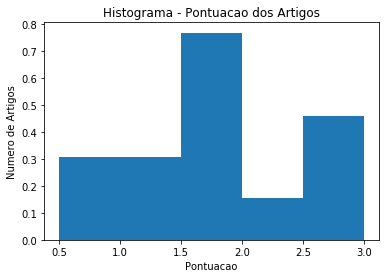

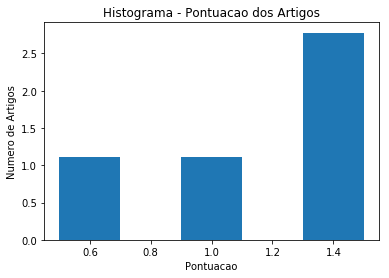

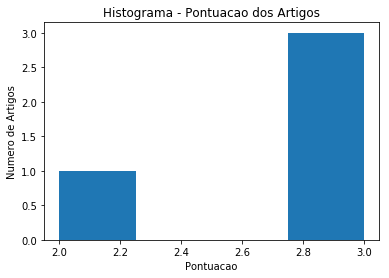

In [18]:
def mostrar_histograma_artigos_pontuacao(df, estaNormalizado):

    dfPoint = pd.DataFrame(np.array(df.iloc[1:,7]))

    dfPoint.columns = ['somatorio']
    dfPoint = dfPoint.apply(pd.to_numeric)

    hist=np.histogram(dfPoint['somatorio'], density=True)

    plt.hist(dfPoint['somatorio'], bins='auto', normed=estaNormalizado)  # arguments are passed to np.histogram
    plt.title("Histograma - Pontuacao dos Artigos")
    plt.xlabel("Pontuacao")
    plt.ylabel("Numero de Artigos")
    plt.show()
    
mostrar_histograma_artigos_pontuacao(df1,True)
mostrar_histograma_artigos_pontuacao(df2,True)
mostrar_histograma_artigos_pontuacao(df3,True)

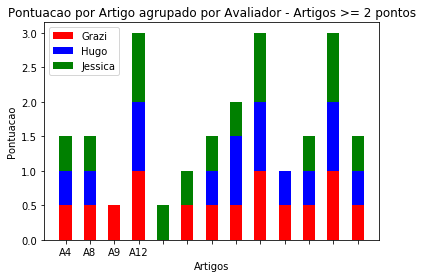

In [8]:
def mostrar_grafico_pontuacao_parcial_por_artigo(df):

    notaGrazi = pd.DataFrame(np.array(df.iloc[1:,4]))
    notaHugo = pd.DataFrame(np.array(df.iloc[1:,5]))
    notaJessica = pd.DataFrame(np.array(df.iloc[1:,6]))

    dfPoint = pd.concat([notaGrazi,notaHugo,notaJessica],axis=1)
    dfPoint.columns = ['notaGrazi','notaHugo','notaJessica']
    dfPoint = dfPoint.apply(pd.to_numeric)

    g = dfPoint['notaGrazi']
    j = dfPoint['notaJessica']
    h = dfPoint['notaHugo']

    N = len(dfPoint)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, g, width, color='red')
    p2 = plt.bar(ind, h, width, bottom=g, color='blue')
    p3 = plt.bar(ind, j, width, bottom=h+g, color='green')

    plt.ylabel('Pontuacao')
    plt.xlabel('Artigos')
#     plt.title('Pontuacao por Artigo agrupado por Avaliador - Todos os Artigos Selecionados')
#     plt.xticks(ind,('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12', 'A13'))
    '''Menos de 2 Pontos'''
#     plt.title('Pontuacao por Artigo agrupado por Avaliador - Artigos < 2 pontos')
#     plt.xticks(ind,('A1','A2','A3','A5','A6','A7','A10','A11', 'A13'))
    '''Maior ou Igual a 2 Pontos'''
    plt.title('Pontuacao por Artigo agrupado por Avaliador - Artigos >= 2 pontos')
    plt.xticks(ind,('A4','A8','A9','A12'))
    plt.yticks(np.arange(0, 3.5, 0.5))
    plt.legend((p1[0], p2[0],p3[0]), ('Grazi','Hugo','Jessica'))
    plt.show()

mostrar_grafico_pontuacao_parcial_por_artigo(df1)

<h2>Rascunho de Códigos</h2>

In [11]:
'''Calculando Médias:'''
idArt = pd.DataFrame(np.array(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13']))
numero = pd.DataFrame(np.array(df1.iloc[1:,0]))
selecionado = pd.DataFrame(np.array(df1.iloc[1:,1]))
titulo = pd.DataFrame(np.array(df1.iloc[1:,3]))
notaGrazi = pd.DataFrame(np.array(df1.iloc[1:,4]))
notaHugo = pd.DataFrame(np.array(df1.iloc[1:,5]))
notaJessica = pd.DataFrame(np.array(df1.iloc[1:,6]))
somatorio = pd.DataFrame(np.array(df1.iloc[1:,7]))
ano = pd.DataFrame(np.array(df1.iloc[1:,8]))

dfPoint = pd.concat([idArt,selecionado,titulo,notaGrazi,notaHugo,notaJessica],axis=1)
dfPoint.columns = ['Id - Artigo','Selecionado Por','Titulo','Nota - Grazi','Nota - Hugo','Nota - Jessica']
# dfPoint = dfPoint.apply(pd.to_numeric)

dfPoint

,Id - Artigo,Selecionado Por,Titulo,Nota - Grazi,Nota - Hugo,Nota - Jessica
0,A1,Grazi,“Evaluation of Kinect 3D Sensor for Healthcare...,0.5,0.5,0.5
1,A2,Grazi,“Helicopter emergency medical service: motivat...,0.5,0.5,0.5
2,A3,Grazi,“Exploring the ambient assisted living domain:...,0.5,0,0
3,A4,Grazi,“Majority-consensus fusion approach for eldery...,1.0,1.0,1.0
4,A5,Jessica,“3D ActionSLAM: Wearable person tracking in mu...,0,0,0.5
5,A6,Jessica,“Enabling Personalised Medical Support for chr...,0.5,0,0.5
6,A7,Jessica,“Behavior and Capability Based Access Control ...,0.5,0.5,0.5
7,A8,Jessica,“Towards online and personalized daily activit...,0.5,1.0,0.5
8,A9,Jessica,“Techonological aspects of WBANs for health mo...,1.0,1.0,1.0
9,A10,Hugo,Information and communications technologies fo...,0.5,0.5,0
